In [1]:
!rm My_first_dataset_neo10.nwb

In [2]:
import neo
from neo import *
import pynwb
from pynwb import *
import quantities as pq
from quantities import s, ms, kHz, Hz, uV
import numpy as np
print("neo = ", neo.__version__)
print("pynwb = ", pynwb.__version__)

neo =  0.9.0.dev
pynwb =  1.1.2


In [3]:
# Test ImageSequence
from neo.core import ImageSequence

img_sequence_array = [[[column for column in range(2)]for row in range(3)] for frame in range(4)]
image_sequence = ImageSequence(img_sequence_array, units='V',
                               sampling_rate=1*pq.Hz, spatial_scale=1*pq.micrometer)
print("image_sequence = ", image_sequence)
print("   ")

#ImageSequence 10 frame with 20 px of height and 20 px of width; units V; datatype int64
#        sampling rate: 1.0
#        spatial_scale: 1.0

print("image_sequence.spatial_scale = ", image_sequence.spatial_scale)
# array(1.) * um

image_sequence =  [[[0 1]
  [0 1]
  [0 1]]

 [[0 1]
  [0 1]
  [0 1]]

 [[0 1]
  [0 1]
  [0 1]]

 [[0 1]
  [0 1]
  [0 1]]] V
   
image_sequence.spatial_scale =  1.0 um


In [4]:
##############
# Example
# imageseq.py
##############http://localhost:8754/notebooks/test_nwbio_class_from_Neo_ImageSequence.ipynb#

from neo.core import ImageSequence
from neo.core import RectangularRegionOfInterest, CircularRegionOfInterest, PolygonRegionOfInterest
import matplotlib.pyplot as plt
import quantities as pq
import random

l = []
for frame in range(50):
    l.append([])
    for y in range(100):
        l[frame].append([])
        for x in range(100):
            l[frame][y].append(random.randint(0, 50))

image_seq = ImageSequence(l, sampling_rate=500 * pq.Hz, spatial_scale='m', units='V')

#result = image_seq.signal_from_region(CircularRegionOfInterest(50, 50, 25),
#                                      CircularRegionOfInterest(10, 10, 5),
#                                      PolygonRegionOfInterest((50, 25), (50, 45), (14, 65),
#                                                              (90, 80)))

result = image_seq.signal_from_region(
                                      CircularRegionOfInterest(50, 50, 25),
                                      #CircularRegionOfInterest(10, 10, 5),
                                      #PolygonRegionOfInterest((50, 25), (50, 45), (14, 65),
                                      #                        (90, 80))
                                      )

print("result = ", result)
print("len(result) = ", len(result))
print("range(len(result)) = ", range(len(result)))


result =  [<AnalogSignal(array([[24.64012251],
       [24.55844819],
       [25.21898928],
       [24.6748341 ],
       [24.59060745],
       [24.74119449],
       [24.69729454],
       [24.58397141],
       [25.38080653],
       [24.74629913],
       [25.53802961],
       [25.27462991],
       [24.79785605],
       [25.1036243 ],
       [24.75497703],
       [25.24961715],
       [24.68402246],
       [24.82950485],
       [25.40530883],
       [25.00663604],
       [24.59264931],
       [25.54772843],
       [25.42113323],
       [25.93312915],
       [24.762634  ],
       [25.3797856 ],
       [24.65492598],
       [25.05410924],
       [25.14599285],
       [24.6202144 ],
       [25.50331802],
       [25.14701378],
       [25.08831036],
       [24.38897397],
       [25.02807555],
       [24.60438999],
       [24.81316998],
       [24.56865748],
       [25.0704441 ],
       [25.20673813],
       [24.76875957],
       [25.43287392],
       [25.0546197 ],
       [24.60336907],
       

i =  0


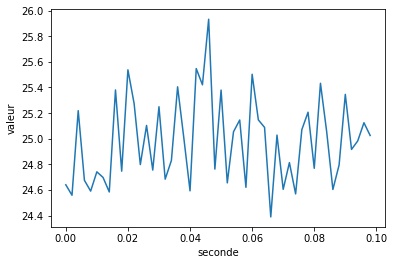

In [5]:
# Plots

for i in range(len(result)):
    print("i = ", i) # 
    plt.figure()
    plt.plot(result[i].times, result[i])
    plt.xlabel("seconde")
    plt.ylabel("valeur")

plt.show()


# Create a nwb file from Neo

## Create 3 Neo blocks and populate each block with 4 Neo segments, and each segment with 3 Neo analogsignals objects and 1 ImageSequence

In [6]:
blocks = []

# Define Neo blocks
bl0 = neo.Block(name='First block')
bl1 = neo.Block(name='Second block')
bl2 = neo.Block(name='Third block')
print("bl0.segments = ", bl0.segments)      
print("bl1.segments = ", bl1.segments)
print("bl2.segments = ", bl2.segments)
blocks = [bl0, bl1, bl2]
#blocks = [bl0]
print("blocks = ", blocks)

num_seg = 4 # number of segments
num_sig = 3 # number of signals

# By giving a name to each blocks, segments, analogsignals, spiketrains, epochs
for blk in blocks: 
    print("blk = ", blk)
    
    for ind in range(num_seg): # number of Segment
        seg = Segment(name='segment %s %d' % (blk.name, ind), index=ind)
        blk.segments.append(seg)

    for seg in blk.segments: # AnalogSignal objects
            
        for ind2 in range(num_sig):
            #print("ind2 = ", ind2)
            print("seg = ", seg)
            # 3 Neo AnalogSignals
            a = AnalogSignal(name='analogsignal %s %s %d' % (blk.name, seg.name, ind2), index=ind2, signal=np.random.randn(num_seg, 44)*pq.nA, sampling_rate=10*kHz)
            #print("a.name = ", a.name)
            b = AnalogSignal(name='analogsignal %s %s %d' % (blk.name, seg.name, ind2), index=ind2, signal=np.random.randn(num_seg, 64)*pq.nA, sampling_rate=10*kHz)
            c = AnalogSignal(name='analogsignal %s %s %d' % (blk.name, seg.name, ind2), index=ind2, signal=np.random.randn(num_seg, 33)*pq.nA, sampling_rate=10*kHz)

            # 1 Neo SpikeTrains
            train = SpikeTrain(name='spiketrain %s %s %d' % (blk.name, seg.name, ind2), index=ind2, times=[1, 2, 3]*s, t_start=1.0, t_stop=10.0)
            #print("train = ", train)
            
            # 1 Neo Epoch
            epc = Epoch(name='epoch %s %s %d' % (blk.name, seg.name, ind2), index=ind2, times=np.arange(0, 30, 10)*s,
                        durations=[10, 5, 7]*ms,
                        labels=np.array(['btn0', 'btn1', 'btn2'], dtype='S'))
            
            
            # 1 ImageSequence
#            img_sequence_array = [[[column for column in range(2)]for row in range(3)] for frame in range(4)]
            img_sequence_array = [[[column for column in range(num_sig)]for row in range(num_seg)] for frame in range(num_sig)]
            image_sequence = ImageSequence(img_sequence_array, units='V',
                                            sampling_rate=1*pq.Hz, spatial_scale=1*pq.micrometer)
            #print("image_sequence = ", image_sequence)
            #print("image_sequence.spatial_scale = ", image_sequence.spatial_scale)
            
        
        seg.spiketrains.append(train)
#        seg.spiketrains.append(image_sequence)
    
        seg.epochs.append(epc)
#        seg.epochs.append(image_sequence)

        seg.analogsignals.append(a)
        seg.analogsignals.append(b)
        seg.analogsignals.append(c)
        seg.analogsignals.append(image_sequence)

blocks

bl0.segments =  []
bl1.segments =  []
bl2.segments =  []
blocks =  [<neo.core.block.Block object at 0x7fddd7be1c50>, <neo.core.block.Block object at 0x7fddd7be1cc0>, <neo.core.block.Block object at 0x7fddd7be1d30>]
blk =  <neo.core.block.Block object at 0x7fddd7be1c50>
seg =  <neo.core.segment.Segment object at 0x7fddd7be1f98>
seg =  <neo.core.segment.Segment object at 0x7fddd7be1f98>
seg =  <neo.core.segment.Segment object at 0x7fddd7be1f98>
seg =  <neo.core.segment.Segment object at 0x7fddd7bfb240>
seg =  <neo.core.segment.Segment object at 0x7fddd7bfb240>
seg =  <neo.core.segment.Segment object at 0x7fddd7bfb240>
seg =  <neo.core.segment.Segment object at 0x7fddd7bfb278>
seg =  <neo.core.segment.Segment object at 0x7fddd7bfb278>
seg =  <neo.core.segment.Segment object at 0x7fddd7bfb278>
seg =  <neo.core.segment.Segment object at 0x7fddd7bfb2b0>
seg =  <neo.core.segment.Segment object at 0x7fddd7bfb2b0>
seg =  <neo.core.segment.Segment object at 0x7fddd7bfb2b0>
blk =  <neo.core.block

[Block with 4 segments
 name: 'First block'
 # segments (N=4)
 0: Segment with 4 analogsignals, 1 epochs, 1 spiketrains
    name: 'segment First block 0'
    # analogsignals (N=4)
    0: AnalogSignal with 44 channels of length 4; units nA; datatype float64 
       name: 'analogsignal First block segment First block 0 2'
       annotations: {'index': 2}
       sampling rate: 10.0
       time: 0.0 to 0.0004
    1: AnalogSignal with 64 channels of length 4; units nA; datatype float64 
       name: 'analogsignal First block segment First block 0 2'
       annotations: {'index': 2}
       sampling rate: 10.0
       time: 0.0 to 0.0004
    2: AnalogSignal with 33 channels of length 4; units nA; datatype float64 
       name: 'analogsignal First block segment First block 0 2'
       annotations: {'index': 2}
       sampling rate: 10.0
       time: 0.0 to 0.0004
    3: ImageSequence 3 frame with 3 px of width and 4 px of height; units V; datatype int64 
       sampling rate: 1.0
       spatial

# Write a nwb file

## Using Neo NWBIO

In [7]:
filename='My_first_dataset_neo10.nwb'

In [8]:
writer = NWBIO(filename, mode='w')
writer.write(blocks)

/home/elodie/miniconda2/envs/env_NWB_py3_pynwb_1_1_2/lib/python3.6/site-packages/pynwb/file.py:691: UserWarning: Date is missing timezone information. Updating to local timezone.
  warn("Date is missing timezone information. Updating to local timezone.")
/home/elodie/miniconda2/envs/env_NWB_py3_pynwb_1_1_2/lib/python3.6/site-packages/hdmf/build/map.py:949: MissingRequiredWarning: attribute 'unit' for 'data' (TimeSeries)
  warnings.warn(msg, MissingRequiredWarning)
/home/elodie/miniconda2/envs/env_NWB_py3_pynwb_1_1_2/lib/python3.6/site-packages/hdmf/build/map.py:949: MissingRequiredWarning: attribute 'unit' for 'data' (ImageSeries)
  warnings.warn(msg, MissingRequiredWarning)


In [9]:
writer

# Read the NWB file

## Using pynwb

In [10]:
io = pynwb.NWBHDF5IO(filename, mode='r') # Open a file with NWBHDF5IO
_file = io.read()

In [11]:
_file

root pynwb.file.NWBFile at 0x140590738559832
Fields:
  acquisition: {
    ImageSequence First block segment First block 0 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence First block segment First block 1 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence First block segment First block 2 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence First block segment First block 3 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence Second block segment Second block 0 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence Second block segment Second block 1 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence Second block segment Second block 2 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence Second block segment Second block 3 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence Third block segment Third block 0 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence Third block segment Third block 1 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence Third block se

In [12]:
print(_file)
_file.acquisition

root pynwb.file.NWBFile at 0x140590738559832
Fields:
  acquisition: {
    ImageSequence First block segment First block 0 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence First block segment First block 1 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence First block segment First block 2 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence First block segment First block 3 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence Second block segment Second block 0 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence Second block segment Second block 1 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence Second block segment Second block 2 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence Second block segment Second block 3 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence Third block segment Third block 0 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence Third block segment Third block 1 3 <class 'pynwb.image.ImageSeries'>,
    ImageSequence Third block se

{'ImageSequence First block segment First block 0 3': ImageSequence First block segment First block 0 3 pynwb.image.ImageSeries at 0x140590735338408
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (4, 3, 2), type "<i8">
   description: no description
   rate: 1.0
   resolution: -1.0
   starting_time: 0.0
   starting_time_unit: seconds,
 'ImageSequence First block segment First block 1 3': ImageSequence First block segment First block 1 3 pynwb.image.ImageSeries at 0x140590735338520
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (4, 3, 2), type "<i8">
   description: no description
   rate: 1.0
   resolution: -1.0
   starting_time: 0.0
   starting_time_unit: seconds,
 'ImageSequence First block segment First block 2 3': ImageSequence First block segment First block 2 3 pynwb.image.ImageSeries at 0x140590735339416
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (

## Using Neo NWBIO

In [13]:
reader = NWBIO(filename, mode='r')

In [14]:
reader

In [15]:
all_blocks = reader.read()

In [16]:
all_blocks

[Block with 1 segments
 description: 'My_first_dataset_neo10.nwb'
 annotations: {'file_access_dates': [datetime.datetime(2020, 2, 28, 15, 30, 20, 1371, tzinfo=tzoffset(None, 3600))],
   'file_read_log': ''}
 file_origin: 'My_first_dataset_neo10.nwb'
 file_datetime: [datetime.datetime(2020, 2, 28, 15, 30, 20, 1371, tzinfo=tzoffset(None, 3600))]
 rec_datetime: datetime.datetime(2020, 2, 28, 15, 30, 19, 999382, tzinfo=tzoffset(None, 3600))
 # segments (N=1)
 0: Segment with 1 epochs name: 'NeoNWB IO' # analogsignals (N=0),
 Block with 1 segments
 description: 'My_first_dataset_neo10.nwb'
 annotations: {'file_access_dates': [datetime.datetime(2020, 2, 28, 15, 30, 20, 1371, tzinfo=tzoffset(None, 3600))],
   'file_read_log': ''}
 file_origin: 'My_first_dataset_neo10.nwb'
 file_datetime: [datetime.datetime(2020, 2, 28, 15, 30, 20, 1371, tzinfo=tzoffset(None, 3600))]
 rec_datetime: datetime.datetime(2020, 2, 28, 15, 30, 19, 999382, tzinfo=tzoffset(None, 3600))
 # segments (N=1)
 0: Segment wit

output_filenames =  My_first_dataset_neo10.nwb
filenames =  My_first_dataset_neo10.nwb


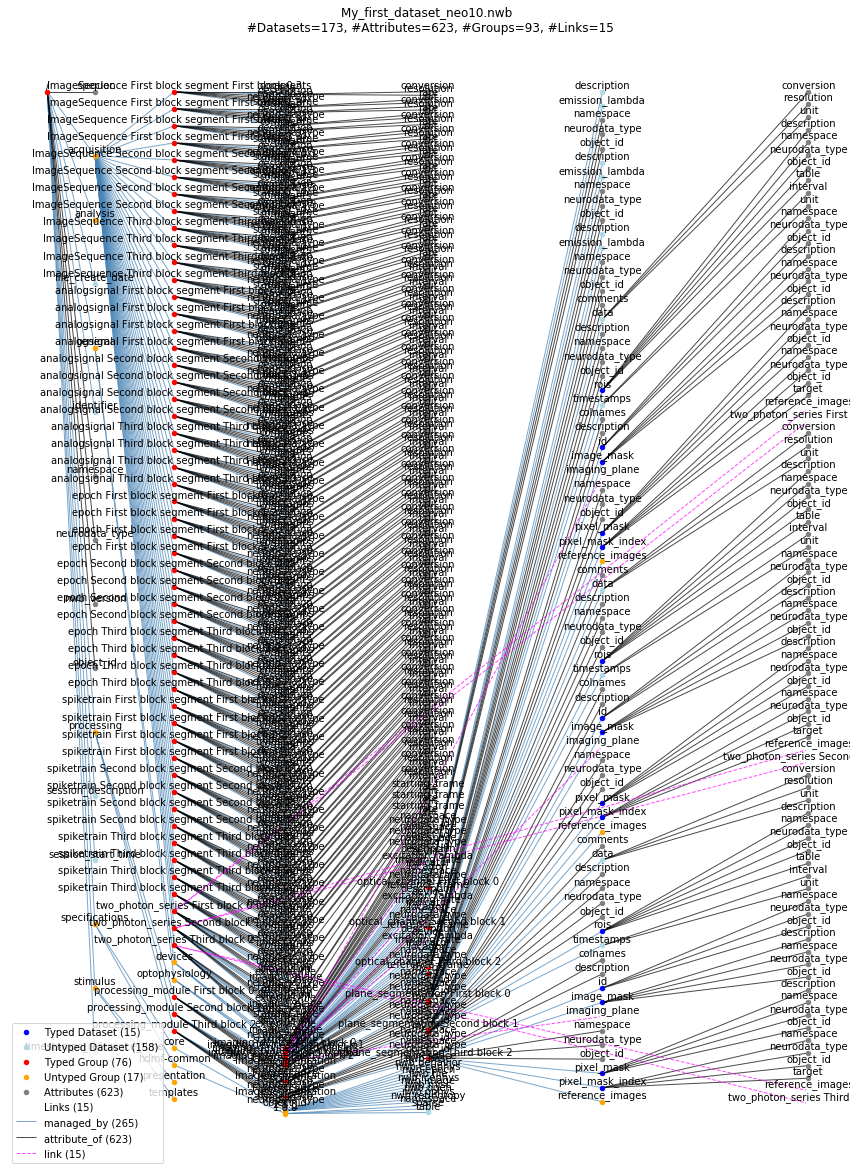

In [17]:
# Plotting settings
show_bar_plot = False    # Change setting to plot distribution of object sizes in the HDF5 file
plot_single_file = True # Plot all files or a single example file
output_filenames = filename
print("output_filenames = ", output_filenames)
    
# Select the files to plot
filenames = output_filenames
print("filenames = ", filenames)

from utils.render import HierarchyDescription, NXGraphHierarchyDescription
import matplotlib.pyplot as plt
        
# Create the plots for all files
file_hierarchy = HierarchyDescription.from_hdf5(filenames)
file_graph = NXGraphHierarchyDescription(file_hierarchy)          
fig = file_graph.draw(show_plot=False,
                      figsize=(12,16),
                      label_offset=(0.0, 0.0065),
                      label_font_size=10)
plot_title = filenames + " \n " + "#Datasets=%i, #Attributes=%i, #Groups=%i, #Links=%i" % (len(file_hierarchy['datasets']), len(file_hierarchy['attributes']), len(file_hierarchy['groups']), len(file_hierarchy['links']))
plt.title(plot_title)
plt.show()
        
# Show a sorted bar plot with the sizes of all datasets in the file
if show_bar_plot:
    d = {i['name']: np.prod(i['size']) for i in file_hierarchy['datasets']}
    l = [w for w in sorted(d, key=d.get, reverse=True)]
    s = [d[w] for w in l]   
    p = np.arange(len(l))   
    fig,ax = plt.subplots(figsize=(16,7))
    ax.set_title(filename)
    ax.bar(p, s, width=1, color='r')
    ax.set_xticks(p+1)  
    ax.set_xticklabels(l)  
    ax.set_yscale("log", nonposy='clip')
    fig.autofmt_xdate(bottom=0.2, rotation=90, ha='right')
    plt.show()
plt.show()

In [18]:
io.read_builder()

{'acquisition': {'ImageSequence First block segment First block 0 3': {'comments': 'no comments',
   'data': {'attributes': {'conversion': 1.0, 'resolution': -1.0},
    'data': <HDF5 dataset "data": shape (4, 3, 2), type "<i8">},
   'description': 'no description',
   'namespace': 'core',
   'neurodata_type': 'ImageSeries',
   'object_id': '422821bf-4500-4707-b945-be9f2821ab1c',
   'starting_time': {'attributes': {'rate': 1.0, 'unit': 'seconds'},
    'data': 0.0}},
  'ImageSequence First block segment First block 1 3': {'comments': 'no comments',
   'data': {'attributes': {'conversion': 1.0, 'resolution': -1.0},
    'data': <HDF5 dataset "data": shape (4, 3, 2), type "<i8">},
   'description': 'no description',
   'namespace': 'core',
   'neurodata_type': 'ImageSeries',
   'object_id': '07d7c926-b3f5-48fe-b381-5f5f714e408d',
   'starting_time': {'attributes': {'rate': 1.0, 'unit': 'seconds'},
    'data': 0.0}},
  'ImageSequence First block segment First block 2 3': {'comments': 'no com